# Práctica 9: Clasificador Bayesiano.

## Realizado por:
- Susana Suárez Mendoza
- Mara Pareja del Pino

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm, model_selection, metrics, naive_bayes, linear_model, neighbors
import matplotlib.pyplot as plt

### Tarea 1: Clasificación de mensajes como spam con Naive Bayes.

In [2]:
data_csv= pd.read_csv('./spam_preprocesado_binario.csv', sep = ',')
df_binario = data_csv.to_numpy()

data_csv2= pd.read_csv('./spam_preprocesado_reales.csv', sep = ',')
df_real = data_csv2.to_numpy()

X = df_binario[:,1:]
y  = df_binario[:,0]

X2 = df_real[:,1:]
y2  = df_real[:,0]

1. Dividir los conjuntos de entrenamiento en train (70%) y test (30%).

In [3]:
X_train_b, X_test_b, y_train_b, y_test_b = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)
X_train_r, X_test_r, y_train_r, y_test_r = model_selection.train_test_split(X2, y2, test_size=0.3, random_state=0)

2. Entrenar las diferentes implementaciones del clasificador Naive Bayes indicadas anteriormente.

In [4]:
implementaciones = [naive_bayes.GaussianNB(), naive_bayes.MultinomialNB(), naive_bayes.ComplementNB(), naive_bayes.BernoulliNB()]
modelos_b = []
modelos_r = []

for item in implementaciones:
    modelos_b.append(item.fit(X_train_b, y_train_b))
    modelos_r.append(item.fit(X_train_r, y_train_r))


3. Obtener para los dos conjuntos de datos la tasa de acierto (accuracy).

In [5]:
df = pd.DataFrame(columns=['Modelo', 'Accuracy (binario)', 'Accuracy (real)'])
for i in range(len(modelos_b)):
    df.loc[i] = [str(modelos_b[i]).split('(')[0], modelos_b[i].score(X_test_b, y_test_b), modelos_r[i].score(X_test_r, y_test_r)]

display(df)

,Modelo,Accuracy (binario),Accuracy (real)
0,GaussianNB,0.778110,0.741029
1,MultinomialNB,0.834928,0.957536
2,ComplementNB,0.750598,0.938995
3,BernoulliNB,0.870215,0.974880


En primer lugar, el accuracy (exactitud) es una métrica de evaluación que indica la proporción de muestras clasificadas correctamente por el modelo.
$$ Accuracy = \frac {verdaderos \space positivos + verdaderos \space negativos}{verdaderos \space positivos + verdaderos \space negativos + falsos \space positivos + falsos \space negativos} $$

Como observamos en la tabla mostrada anteriormente, para el caso de datos binarios (0, 1) el modelo con mayor precisión es el BernoulliNB el cuál se utiliza cuando las características son booleanas ya que supone una distribución de Bernoulli. Lo cuál es coherente ya que este tipo de datos nos indica si la palabra que aparece como nombre de la característica está contenida en el mensaje o no.

Por otra parte, en cuánto a los datos reales, el modelo cuya precisión es máxima es BernoulliNB al igual que en el caso anterior. Esto contradice a la teoría ya que esta distribución es para datos binarios y los datos que tenemos son los reales, los cuales miden la frecuencia de aparición de la palabra en el mensaje y el número de mensajes en los que aparece. El mejor modelo teóricamente sería la clase MultinomialNB ya que se utilizaría en el caso de que las características se correspondan con el número de apariciones de un determinado valor.

4. Obtener las matrices de confusión.

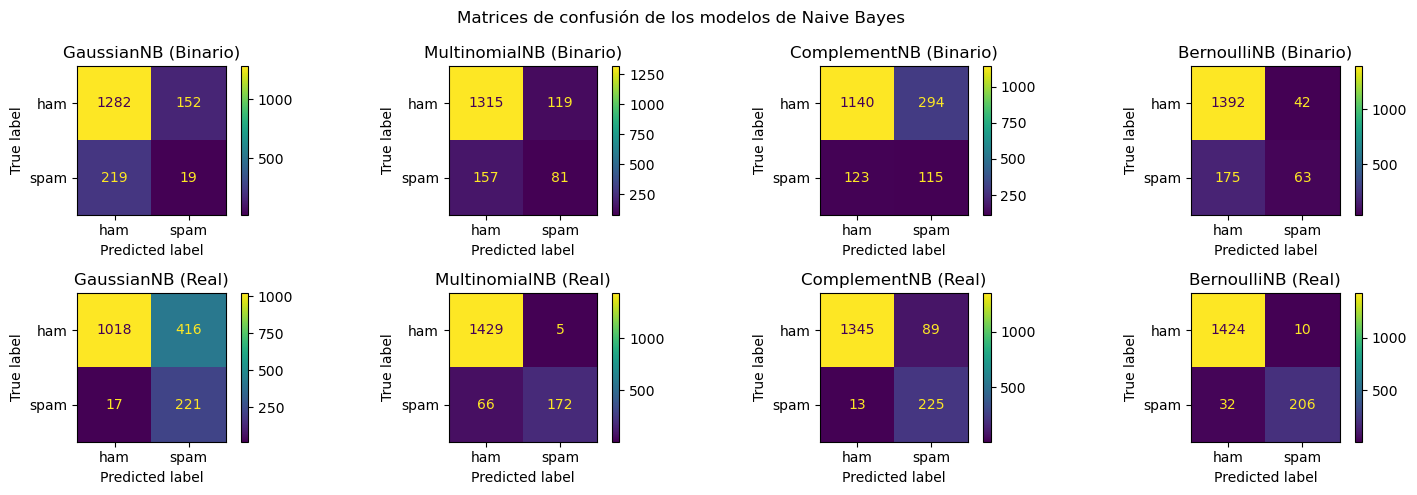

In [6]:

fig, (ax1, ax2) = plt.subplots(2, 4, figsize=(15, 5))
fig.suptitle('Matrices de confusión de los modelos de Naive Bayes')

for i in range(len(modelos_b)):
    confusion_matrix = metrics.confusion_matrix(y_test_b, modelos_b[i].predict(X_test_b))
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=modelos_b[i].classes_).plot(ax=ax1[i])
    ax1[i].set_title(modelos_b[i].__class__.__name__ + ' (Binario)')

    confusion_matrix = metrics.confusion_matrix(y_test_r, modelos_r[i].predict(X_test_r))
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=modelos_r[i].classes_).plot(ax=ax2[i])
    ax2[i].set_title(modelos_r[i].__class__.__name__ + ' (Real)')

plt.tight_layout()
plt.show()

5. Analizar y explicar los resultados obtenidos con cada clasificador en función de las medidas anteriores.

En segundo lugar, la matriz de confusión es una tabla que se utiliza también para evaluar la precisión de un modelo salvo que se divide en 4 secciones: verdaderos positivos, falsos positivos, falsos negativos y verdaderos negativos.

En el primer caso de datos binarios, nos sorprende que dónde hay una mayor cantidad de verdaderos positivos y una menor cantidad de falsos positivos es en el caso BernoulliNB. Sin embargo, no es este el modelo cuya menor cantidad de falsos positivos y verdaderos negativos posee, el modelo que los presenta es el ComplementNB utilizado cuándo las clases están desbalanceadas.

En el segundo caso de datos reales, sucede lo mismo que en el caso anterior salvo que el mejor modelo para la clase positiva es el MultinomialNB al igual que en la teoría mientras que para la clase negativa es el ComplementNB.

Por lo que podemos concluir que las clases están muy desbalanceadas.

### Tarea 2: Comparación de clasificación de mensajes spam.

1. Dividir los conjuntos de entrenamiento en train (70%) y test (30%).

In [7]:
X_train_b, X_test_b, y_train_b, y_test_b = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)
X_train_r, X_test_r, y_train_r, y_test_r = model_selection.train_test_split(X2, y2, test_size=0.3, random_state=0)

2. Entrenar los clasificadores vistos en las prácticas anteriores (Perceptron, Regresión Logística, SVM, Vecinos más Cercanos).

In [8]:
clasificadores = [linear_model.Perceptron(), linear_model.LogisticRegression(), svm.SVC(kernel = 'linear'), svm.SVC(kernel = 'rbf'), svm.SVC(kernel = 'poly'), 
                  neighbors.KNeighborsClassifier(n_neighbors=1), neighbors.KNeighborsClassifier(n_neighbors=3), neighbors.KNeighborsClassifier(n_neighbors=5)]
modelos_b = []
modelos_r = []

for item in clasificadores:
    modelos_b.append(item.fit(X_train_b, y_train_b))
    modelos_r.append(item.fit(X_train_r, y_train_r))


3. Mostrar en una tabla para cada conjunto de datos, los valores de la tasa de acierto (accuracy).

In [9]:
nombres = ['Perceptron', 'Regresión Logística', 'SVM (lineal)', 'SVM (rbf)', 'SVM (polinómico)', 'KNN (k=1)', 'KNN (k=3)', 'KNN (k=5)']

df = pd.DataFrame(columns=['Modelo', 'Accuracy (binario)', 'Accuracy (real)'])
for i in range(len(modelos_b)):
    df.loc[i] = [nombres[i], modelos_b[i].score(X_test_b, y_test_b), modelos_r[i].score(X_test_r, y_test_r)]

display(df)


,Modelo,Accuracy (binario),Accuracy (real)
0,Perceptron,0.718301,0.975478
1,Regresión Logística,0.849880,0.963517
2,SVM (lineal),0.766148,0.971292
3,SVM (rbf),0.857656,0.975478
4,SVM (polinómico),0.839713,0.958134
5,KNN (k=1),0.845096,0.955144
6,KNN (k=3),0.849880,0.939593
7,KNN (k=5),0.856459,0.924641


4. Analizar y explicar los resultados obtenidos.

En resumen, ningún modelo se adapta mejor a los datos binarios que a los datos reales ya que el accuracy es siempre menor en columna de los binarios. Y además, el modelo con mejor resultado para datos binarios es la Máquina de vectores de soporte cuyo núcleo es una función de distancia radial. 

Por otro lado, para los datos los modelos que destacan con igual precisión (0.975478) son el Perceptrón y el mensionado anteriormente para datos binarios.

Por lo que en este caso el mejor modelo para ambos tipos de datos es la Máquina de vectores de soporte.

Al comparar los modelos de este ejercicio con los modelos de Naive Bayes del ejercicio anterior para datos binarios se adapta mejor el BernulliNB superando a la máquina de vectores de soporte es un 2%. Sin embargo, a los datos reales se adapta mejor el modelo de Máquina de vectores de soporte en un 0.1% por lo que no hay diferencia significativa.